In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import h2o
from h2o.automl import H2OAutoML

In [22]:
h2o.init(ip ='localhost', port = 54321)




Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,20 mins 56 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_simenvoldqvam_9hznas
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.825 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [23]:
#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/dataset_train_without_rev_features.csv")
#test_df = h2o.import_file("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/dataset_train_with_stores_extra.csv")

#test_train = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_train.csv")
#test_test = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/test_test.csv")
#rev_labels = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/revenue_labels.csv")

#train_df = h2o.import_file("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/train_data/train_data.csv")
test_df = h2o.import_file("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/dataset_test_without_rev_features.csv") 

test_dist = h2o.import_file("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv")
train_dist = h2o.import_file("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/train_set_with_only_distance_feat.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
rev = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/revenue_labels.csv")
test = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/train_data/test_set_with_only_distance_feat.csv")

In [37]:
test_dist

C1,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivå,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivå,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass
0,5399,0.683306,4.82227e-20,8.78156e-14,7.59228e-72,1.02347e-08,2.02288e-197,0.012216,6.11543e-06,5.7148e-05,2.4578e-12,1.50182e-12,0.377311,1.75105e-122,1.11148e-43,1.39762e-52,0.998125,0.381954,1.70667e-08,2.84641e-08,1.22616e-31,0.000309021,0.000309021,0.0125749,0.0125749,1168,1054,27,64,10,13,0,0.00023121,0.0301654,0.0102815,0.0264716,0.0138859,0.159301
1,636,0.113132,2.62004e-27,3.32722e-09,2.48631e-87,4.21976e-08,5.63781e-224,0.0324282,2.09171e-08,0.0494804,2.60544e-07,8.05192e-10,0.843881,2.15816e-143,9.0048e-55,1.55023e-65,0.149852,0.00751798,1.17858e-12,2.92713e-05,5.6422e-41,0.000275592,0.000275592,0.0159886,0.0159886,380,83,287,3,0,7,0,0.0224221,0.00101368,0.0193961,0.489463,0.0192575,0.135651
2,1309,0.678537,1.82975e-19,2.00409e-14,2.07644e-70,5.79627e-09,1.00247e-194,0.00808175,7.60121e-06,2.25052e-05,5.37694e-13,5.06679e-13,0.27799,1.93939e-120,1.00269e-42,2.05564e-51,0.970573,0.44577,3.18724e-08,9.68776e-09,7.43466e-31,8.75107e-06,8.75127e-06,0.0422396,0.0422396,564,522,11,20,0,2,9,0.0036903,0.0174625,0.0126024,0.171475,0.0783459,0.024432
3,1253,4.58944e-08,2.45752e-07,2.70998e-16,5.4855e-50,0.000276319,4.97143e-177,0.00022819,0.974723,1.86427e-14,3.91705e-19,6.85265e-10,5.07373e-08,3.98205e-100,1.32599e-23,8.11809e-33,4.89441e-06,0.000942164,0.213707,2.14515e-10,6.32782e-15,0.00512888,0.00512888,0.0608901,0.0608901,651,237,395,15,0,0,4,0.00288747,0.00334835,0.0191456,0.409014,0.746042,0.0336374
4,5345,0.673142,5.56696e-20,9.06402e-14,9.36098e-72,1.11394e-08,2.42629e-197,0.01262,6.67109e-06,5.54939e-05,2.44836e-12,1.61503e-12,0.373224,2.15195e-122,1.35816e-43,1.69896e-52,0.99878,0.39053,1.8873e-08,2.94125e-08,1.45994e-31,0.00398779,0.00398779,0.0125749,0.0125749,1156,1042,27,64,10,13,0,0.000919385,0.0229259,0.00798231,0.0262471,0.0173485,0.155829
5,4608,0.723636,2.8535e-20,7.29738e-14,3.72526e-72,7.12474e-09,1.23791e-197,0.0105358,4.34758e-06,6.18723e-05,2.34972e-12,1.0754e-12,0.388642,9.18234e-123,5.41804e-44,7.0869e-53,0.992237,0.350831,1.16701e-08,2.39109e-08,6.52929e-32,0.000753435,0.000753435,0.0260949,0.0260949,1059,951,26,59,10,13,0,0.000333413,0.014301,0.0151867,0.0637972,0.0157964,0.142597
6,1529,3.90001e-08,1.75215e-07,5.08345e-16,1.91396e-50,0.000396862,4.34086e-178,0.000265126,0.987114,2.31488e-14,6.80088e-19,1.20407e-09,4.98995e-08,7.31534e-101,7.45653e-24,3.60827e-33,4.3811e-06,0.000823347,0.186819,3.36862e-10,3.96921e-15,0.000420522,0.00067922,0.000978445,0.000978445,791,253,508,23,0,0,7,0.00171

In [26]:
rev_labels = rev.drop(["Unnamed: 0"], axis = 1)
rev_labels["log_revenue"] = np.log(1+rev_labels.revenue)



Text(0.5, 1.0, 'Log revenue')

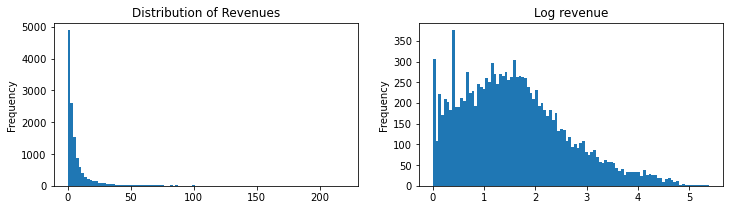

In [27]:
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
rev_labels.revenue.plot.hist(bins=100, ax=ax1)
ax1.set_title('Distribution of Revenues');
rev_labels.log_revenue.plot.hist(bins=100, ax = ax2)
ax2.set_title("Log revenue")



In [28]:
rev = h2o.H2OFrame(rev_labels)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
test_df[:, 1]

store_id
914206820-914239427-717245
916789157-916823770-824309
913341082-977479363-2948
889682582-889697172-28720
997991699-998006945-417222
914931487-815162862-756427
967062979-972338656-6209
914631734-914748119-740036
970976361-973961837-23171
979425031-979584385-54031


In [30]:
#x_train = test_train.drop([0], axis = 0)

rev2 = rev[:, 0]


df = train_dist.drop("C1", axis = 1)


x_train = df.cbind(rev2)


list_df = ["mall__is", "geo__Cluster 4 similarity", "geo__Cluster 6 similarity",
 "geo__Cluster 7 similarity","geo__Cluster 0 similarity", "geo__Cluster 1 similarity", 
 "geo__Cluster 2 similarity", "geo__Cluster 3 similarity", "geo__Cluster 5 similarity", "geo__Cluster 8 similarity"]


stores_id = test_df[:, 1]


y_test1 = test_dist.drop("C1", axis = 1 )


y_test = y_test1.cbind(stores_id)
y_test

storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivå,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivå,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass,store_id
5399,0.683306,4.82227e-20,8.78156e-14,7.59228e-72,1.02347e-08,2.02288e-197,0.012216,6.11543e-06,5.7148e-05,2.4578e-12,1.50182e-12,0.377311,1.75105e-122,1.11148e-43,1.39762e-52,0.998125,0.381954,1.70667e-08,2.84641e-08,1.22616e-31,0.000309021,0.000309021,0.0125749,0.0125749,1168,1054,27,64,10,13,0,0.00023121,0.0301654,0.0102815,0.0264716,0.0138859,0.159301,914206820-914239427-717245
636,0.113132,2.62004e-27,3.32722e-09,2.48631e-87,4.21976e-08,5.63781e-224,0.0324282,2.09171e-08,0.0494804,2.60544e-07,8.05192e-10,0.843881,2.15816e-143,9.0048e-55,1.55023e-65,0.149852,0.00751798,1.17858e-12,2.92713e-05,5.6422e-41,0.000275592,0.000275592,0.0159886,0.0159886,380,83,287,3,0,7,0,0.0224221,0.00101368,0.0193961,0.489463,0.0192575,0.135651,916789157-916823770-824309
1309,0.678537,1.82975e-19,2.00409e-14,2.07644e-70,5.79627e-09,1.00247e-194,0.00808175,7.60121e-06,2.25052e-05,5.37694e-13,5.06679e-13,0.27799,1.93939e-120,1.00269e-42,2.05564e-51,0.970573,0.44577,3.18724e-08,9.68776e-09,7.43466e-31,8.75107e-06,8.75127e-06,0.0422396,0.0422396,564,522,11,20,0,2,9,0.0036903,0.0174625,0.0126024,0.171475,0.0783459,0.024432,913341082-977479363-2948
1253,4.58944e-08,2.45752e-07,2.70998e-16,5.4855e-50,0.000276319,4.97143e-177,0.00022819,0.974723,1.86427e-14,3.91705e-19,6.85265e-10,5.07373e-08,3.98205e-100,1.32599e-23,8.11809e-33,4.89441e-06,0.000942164,0.213707,2.14515e-10,6.32782e-15,0.00512888,0.00512888,0.0608901,0.0608901,651,237,395,15,0,0,4,0.00288747,0.00334835,0.0191456,0.409014,0.746042,0.0336374,889682582-889697172-28720
5345,0.673142,5.56696e-20,9.06402e-14,9.36098e-72,1.11394e-08,2.42629e-197,0.01262,6.67109e-06,5.54939e-05,2.44836e-12,1.61503e-12,0.373224,2.15195e-122,1.35816e-43,1.69896e-52,0.99878,0.39053,1.8873e-08,2.94125e-08,1.45994e-31,0.00398779,0.00398779,0.0125749,0.0125749,1156,1042,27,64,10,13,0,0.000919385,0.0229259,0.00798231,0.0262471,0.0173485,0.155829,997991699-998006945-417222
4608,0.723636,2.8535e-20,7.29738e-14,3.72526e-72,7.12474e-09,1.23791e-197,0.0105358,4.34758e-06,6.18723e-05,2.34972e-12,1.0754e-12,0.388642,9.18234e-123,5.41804e-44,7.0869e-53,0.992237,0.350831,1.16701e-08,2.39109e-08,6.52929e-32,0.000753435,0.000753435,0.0260949,0.0260949,1059,951,26,59,10,13,0,0.000333413,0.014301,0.0151867,0.0637972,0.0157964,0.142597,914931487-815162862-756427
1529,3.90001e-08,1.75215e-07,5.08345e-16,1.91396e-50,0.000396862,4.34086e-178,0.000265126,0.987114,2.31488e-14,6.80088e-19,1.20407e-09,4.98995e-08,7.31534e-101,7.45

In [31]:
x_train.describe()

Rows:12859
Cols:39

,storesinradiustransformer__in_radius,clustersimilarity__Cluster 0 similarity,clustersimilarity__Cluster 1 similarity,clustersimilarity__Cluster 2 similarity,clustersimilarity__Cluster 3 similarity,clustersimilarity__Cluster 4 similarity,clustersimilarity__Cluster 5 similarity,clustersimilarity__Cluster 6 similarity,clustersimilarity__Cluster 7 similarity,clustersimilarity__Cluster 8 similarity,clustersimilarity__Cluster 9 similarity,clustersimilarity__Cluster 10 similarity,clustersimilarity__Cluster 11 similarity,clustersimilarity__Cluster 12 similarity,clustersimilarity__Cluster 13 similarity,clustersimilarity__Cluster 14 similarity,clustersimilarity__Cluster 15 similarity,clustersimilarity__Cluster 16 similarity,clustersimilarity__Cluster 17 similarity,clustersimilarity__Cluster 18 similarity,clustersimilarity__Cluster 19 similarity,closeststore__distance_lv1_desc,closeststore__distance_lv2_desc,closeststore__distance_lv3_desc,closeststore__distance_lv4_desc,remainder__number_of_all_stop_types,remainder__number_of_mangler_viktighetsnivå,remainder__number_of_standard_holdeplass,remainder__number_of_lokalt_knutepunkt,remainder__number_of_nasjonalt_knutepunkt,remainder__number_of_regionalt_knutepunkt,remainder__number_of_annen_viktig_holdeplass,remainder__distance_to_mangler_viktighetsnivå,remainder__distance_to_standard_holdeplass,remainder__distance_to_lokalt_knutepunkt,remainder__distance_to_nasjonalt_knutepunkt,remainder__distance_to_regionalt_knutepunkt,remainder__distance_to_annen_viktig_holdeplass,revenue
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int,int,int,int,int,real,real,real,real,real,real,real
mins,0.0,3.1096227568454927e-228,2.251218749212348e-146,0.0,2.921216006688298e-132,2.1940082234509567e-264,0.0,1.5469357836879774e-252,5.1160071223360456e-210,0.0,0.0,0.0,1.1525024558440659e-247,2.1398281687473123e-206,1.3572267009638662e-108,1.9264775378918656e-103,3.998274963524455e-228,8.56591516713741e-215,8.413188476853861e-185,0.0,1.025870924756634e-124,4.100614250572248e-11,4.1124208190132345e-11,4.1124208190132345e-11,4.1124208190132345e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.532953091389676e-05,0.0001385911039618,0.0001424064366916,0.0001414601598365,8.51192219671041e-05,0.0001501584724423,0.0
mean,1069.8980480597247,0.24132041704777085,0.011527785267649115,0.09731545055095339,0.01686293474058586,0.024724174619995366,0.004291364979031769,0.026180743480812077,0.056017010951217874,0.04897519544312284,0.09133210687967272,0.041450185685470695,0.20896128571168954,0.005882578562753742,0.012085473676027228,0.014366282915858316,0.32323450962079936,0.14155544595867384,0.02741282388475906,0.030733050057328928,0.019158008941872775,0.009744621482940358,0.026987166078380004,0.0799160888161056,0.08770656181412441,419.52095808383234,336.6983435725951,56.74422583404619,16.646084454467687,2.573994867408041,4.871996267205848,1.9863130881094953,0.00561196507314336,0.061045800138231944,0.05444826919781583,0.2466374972469288,0.16464638917947977,0.8636655897448071,8.220683101329808
maxs,5496.0,0.9998745178714216,0.9413439777447444,0.9997010547399612,0.9967939461854736,0.9980491716849782,0.9403266659232048,0.997818647237539,0.9998083463885632,0.9916008122822876,0.9999901127919136,0.9989239694021066,0.9974318710375722,0.93108507171708,0.9999184883562134,0.9958223162856412,0.9999986470525132,0.9997362167761016,0.9967363592294743,0.9920545411298316,0.957122100429424,1.2149787209979197,1.6943705788049048,12.179958473050242,12.179958473050242,1186.0,1104.0,601.0,76.0,21.0,36.0,24.0,0.4939073589317806,1.0569651326119416,1.1830839446311443,2.070690562197816,5.124139578947495,9.505990411832457,219.599
sigma,1631.5544403081678,0.3180581832541044,0.08305035420060022,0.2621992694775512,0.11917038172832525,0.12570877123867652,0.056223914516245845,0.10092314897929455,0.21097833746077996,0.18615962966044255,0.25290810645040973,0.16323830550570798,0.283674583687400

In [38]:
x = x_train.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame= x_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,8.1832285,0.1777778,8.058368,7.946925,8.386766,8.28591,8.238174
mean_residual_deviance,229.28162,31.065187,200.416,201.66612,275.5397,240.4047,228.38158
mse,229.28162,31.065187,200.416,201.66612,275.5397,240.4047,228.38158
null_deviance,608210.4,90576.336,535950.4,534581.06,749782.7,642937.75,577799.9
r2,0.0289282,0.0068449,0.0201601,0.0233357,0.0354901,0.0345286,0.0311265
residual_deviance,589821.94,84146.41,525089.94,521306.9,722465.1,620484.5,559763.25
rmse,15.114886,1.0135494,14.1568365,14.200919,16.599388,15.50499,15.112299
rmsle,1.1785364,0.0095440,1.1874269,1.1734761,1.1703949,1.1710972,1.190287


In [43]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
best_model = aml.get_best_model()

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,algo
StackedEnsemble_AllModels_1_AutoML_4_20221108_184429,15.1447,229.362,8.18281,1.17784,229.362,StackedEnsemble
GBM_1_AutoML_4_20221108_184429,15.1518,229.577,8.19549,1.17911,229.577,GBM
StackedEnsemble_BestOfFamily_1_AutoML_4_20221108_184429,15.1539,229.642,8.19483,1.17978,229.642,StackedEnsemble
GBM_2_AutoML_4_20221108_184429,15.1931,230.832,8.22918,1.18143,230.832,GBM
GBM_4_AutoML_4_20221108_184429,15.228,231.891,8.24792,1.17994,231.891,GBM
GBM_3_AutoML_4_20221108_184429,15.2283,231.9,8.23568,1.18025,231.9,GBM
GLM_1_AutoML_4_20221108_184429,15.3501,235.626,8.33298,nan,235.626,GLM
XGBoost_3_AutoML_4_20221108_184429,15.4534,238.808,8.35217,nan,238.808,XGBoost
XRT_1_AutoML_4_20221108_184429,15.7013,246.531,8.63387,1.20769,246.531,DRF
DRF_1_AutoML_4_20221108_184429,15.7027,246.574,8.61547,1.20342,246.574,DRF


In [44]:
m = h2o.get_model(lb[2,"model_id"])
m.varimp(use_pandas=True)




In [45]:
#model = h2o.get_model(lb[2,"model_id"])
prediction = aml.leader.predict(y_test)
df = y_test.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "predicted"})
#submission.to_csv("Only_dist_features.csv", index = False)

submission






stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,id,predicted
0,914206820-914239427-717245,6.311903
1,916789157-916823770-824309,13.758228
2,913341082-977479363-2948,4.737071
3,889682582-889697172-28720,9.104514
4,997991699-998006945-417222,7.459435
...,...,...
8572,917323003-917383529-844309,5.041903
8573,917353379-917411824-845904,6.196589
8574,917072302-917089248-833647,6.202142
8575,916960557-916993161-829908,7.707010


In [42]:
submission["predicted"] = np.exp(submission["predict"]) - 1

submit = submission.drop("predict", axis = 1)
submit.to_csv("Reveneue_transformed2.csv", index = False)
submit                               

KeyError: 'predict'

In [ ]:
best_of = pd.read_csv("C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/notebooks/Arash/StackedEnsembleBestOfFamily.csv")
best_of

,id,predicted
0,914206820-914239427-717245,4.456851
1,916789157-916823770-824309,4.610909
2,913341082-977479363-2948,2.558722
3,889682582-889697172-28720,4.062493
4,997991699-998006945-417222,25.578228
...,...,...
8572,917323003-917383529-844309,8.825647
8573,917353379-917411824-845904,2.923221
8574,917072302-917089248-833647,33.390177
8575,916960557-916993161-829908,27.035976


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf0d2ccf40>,
      dtype=object)

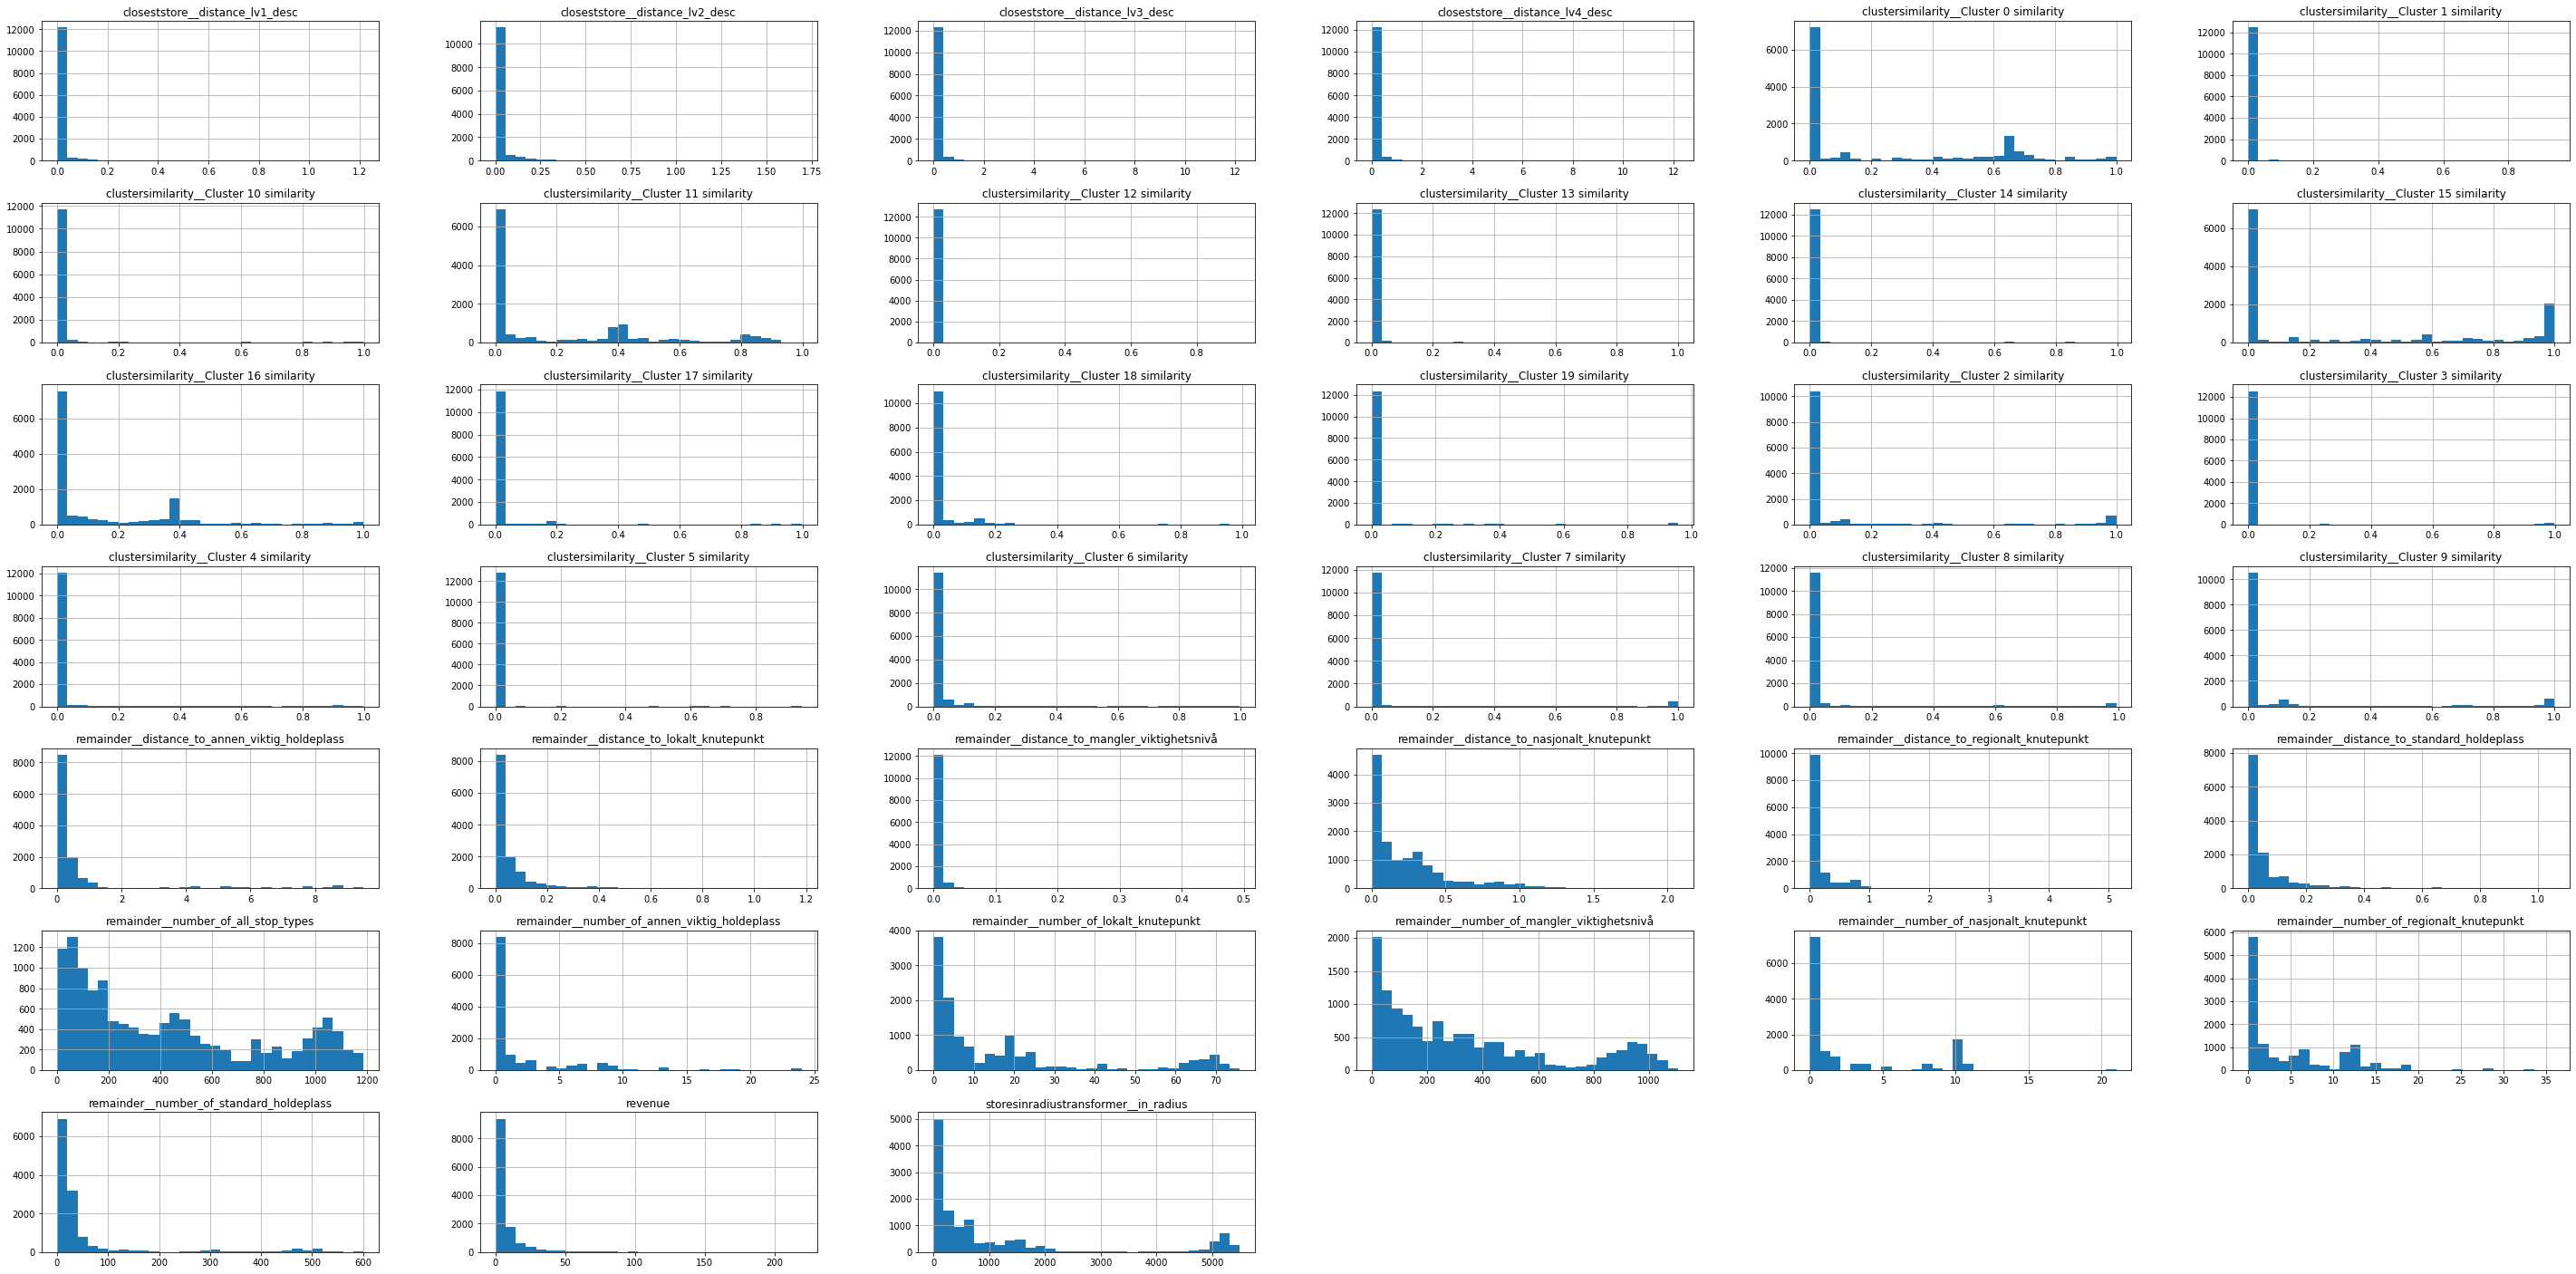

In [ ]:
df_x = x_train.as_data_frame(use_pandas=True)


df_x.hist(bins=30, figsize = (50,25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faef461cb20>,
      dtype=object)

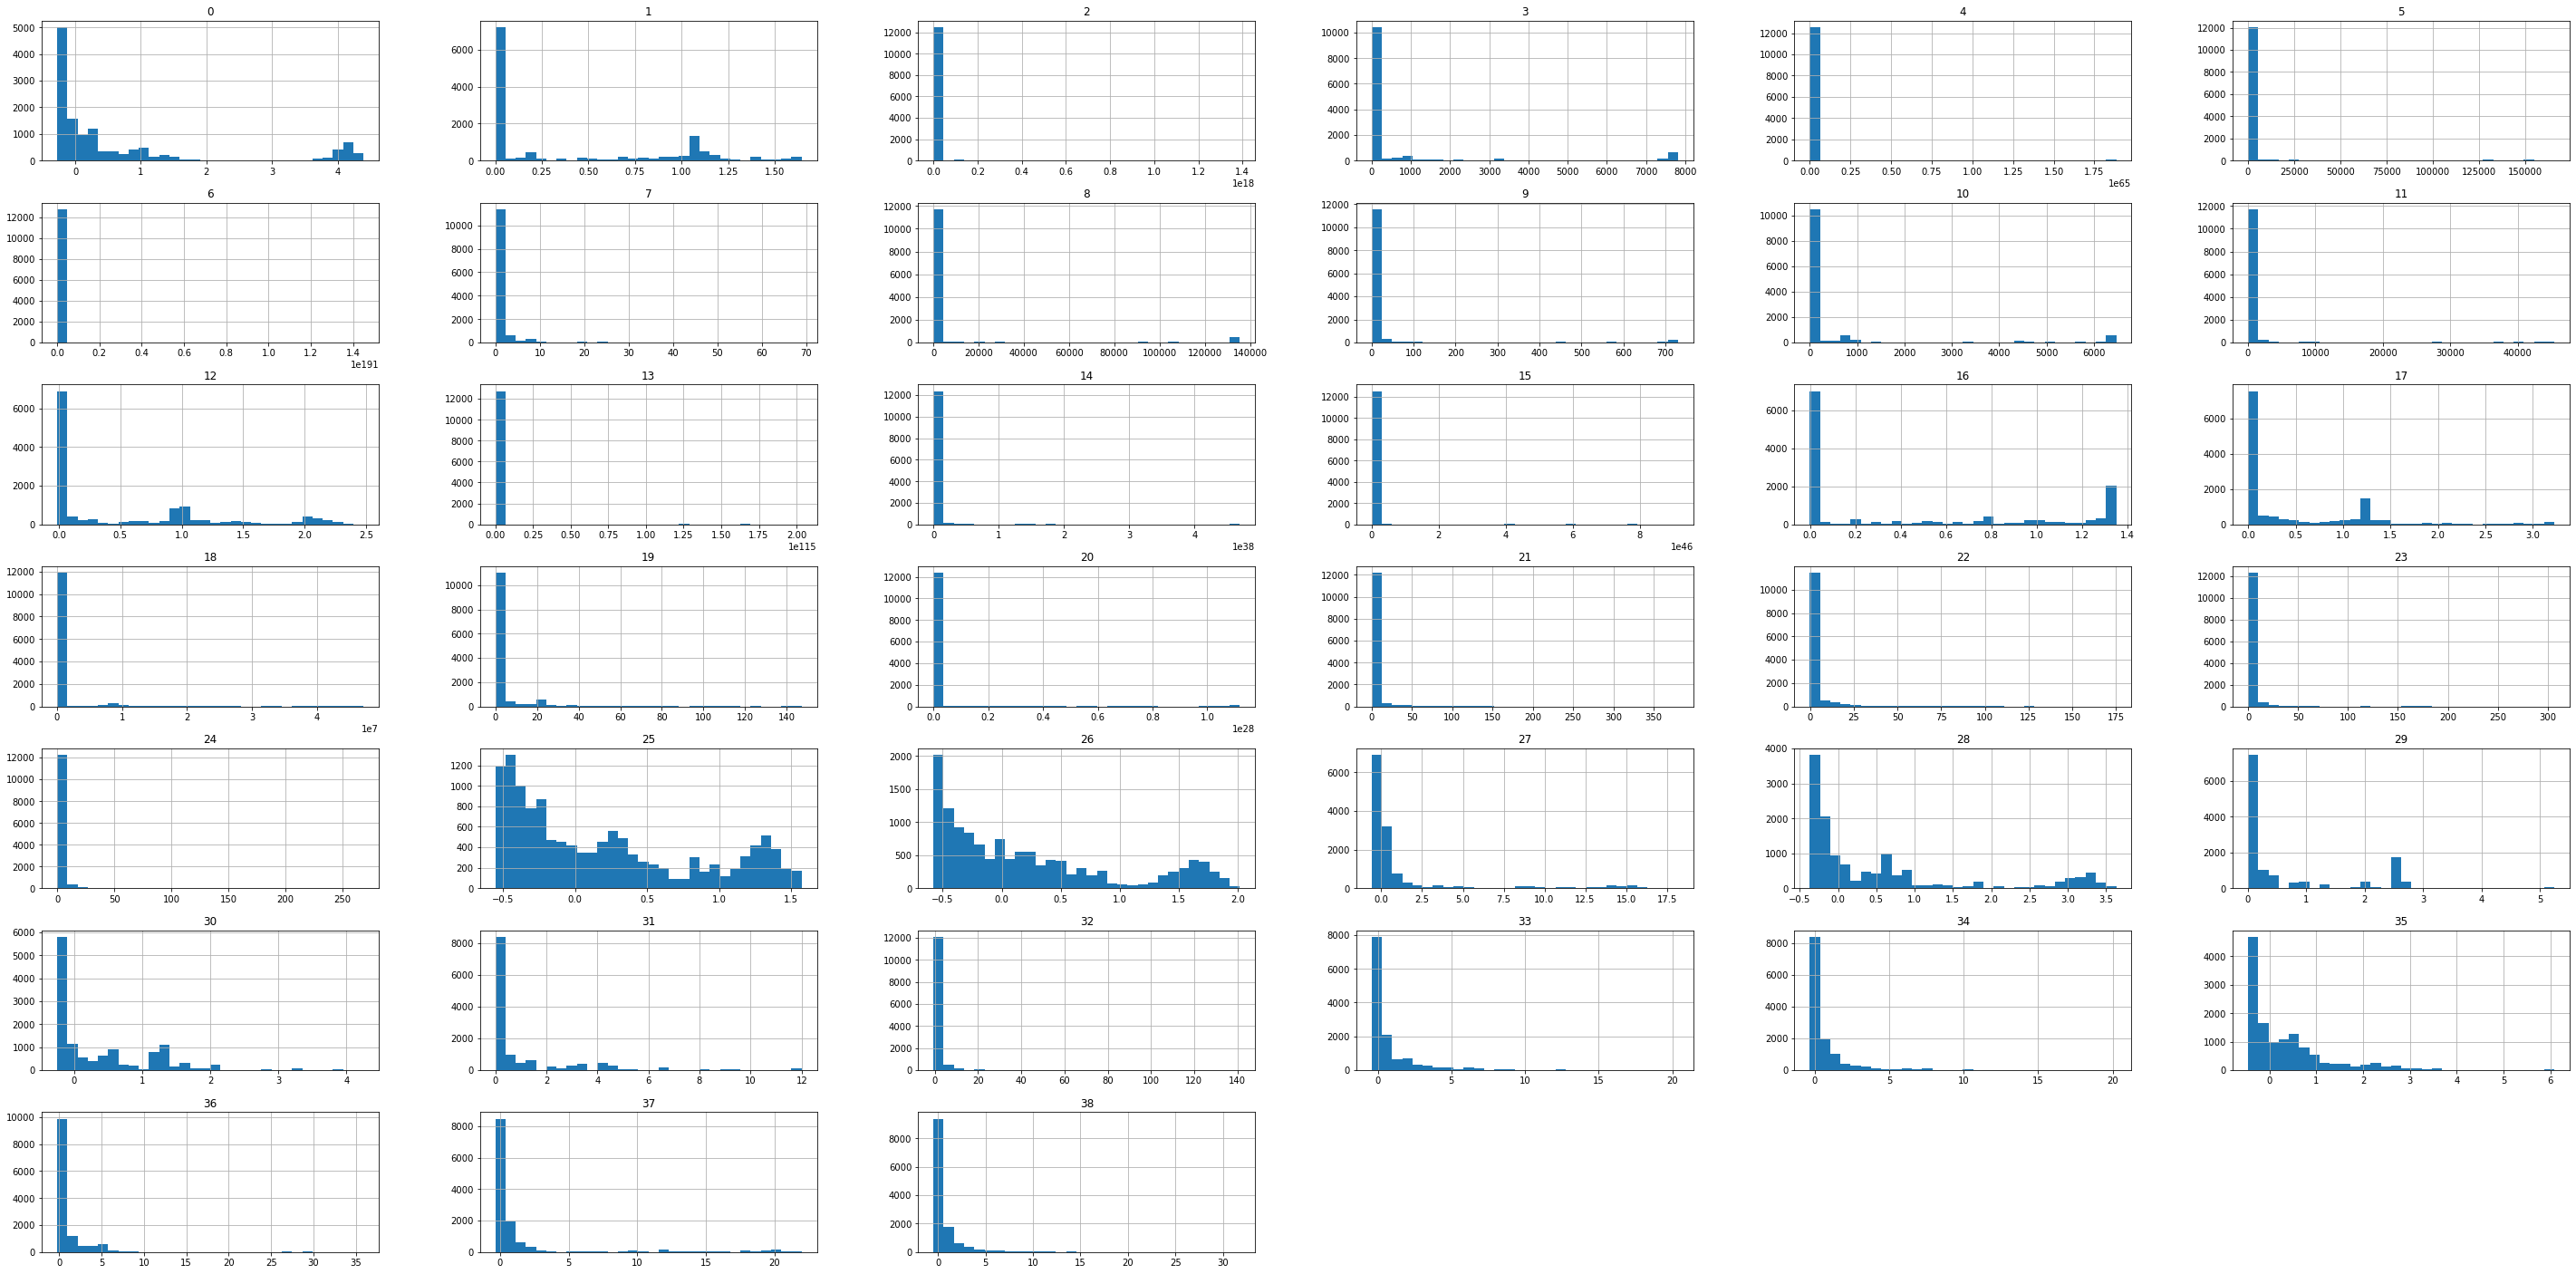

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df_x))
df_robust_scaler.hist(bins=30, figsize = (50,25))

/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faef58cd0a0>,
      dtype=object)

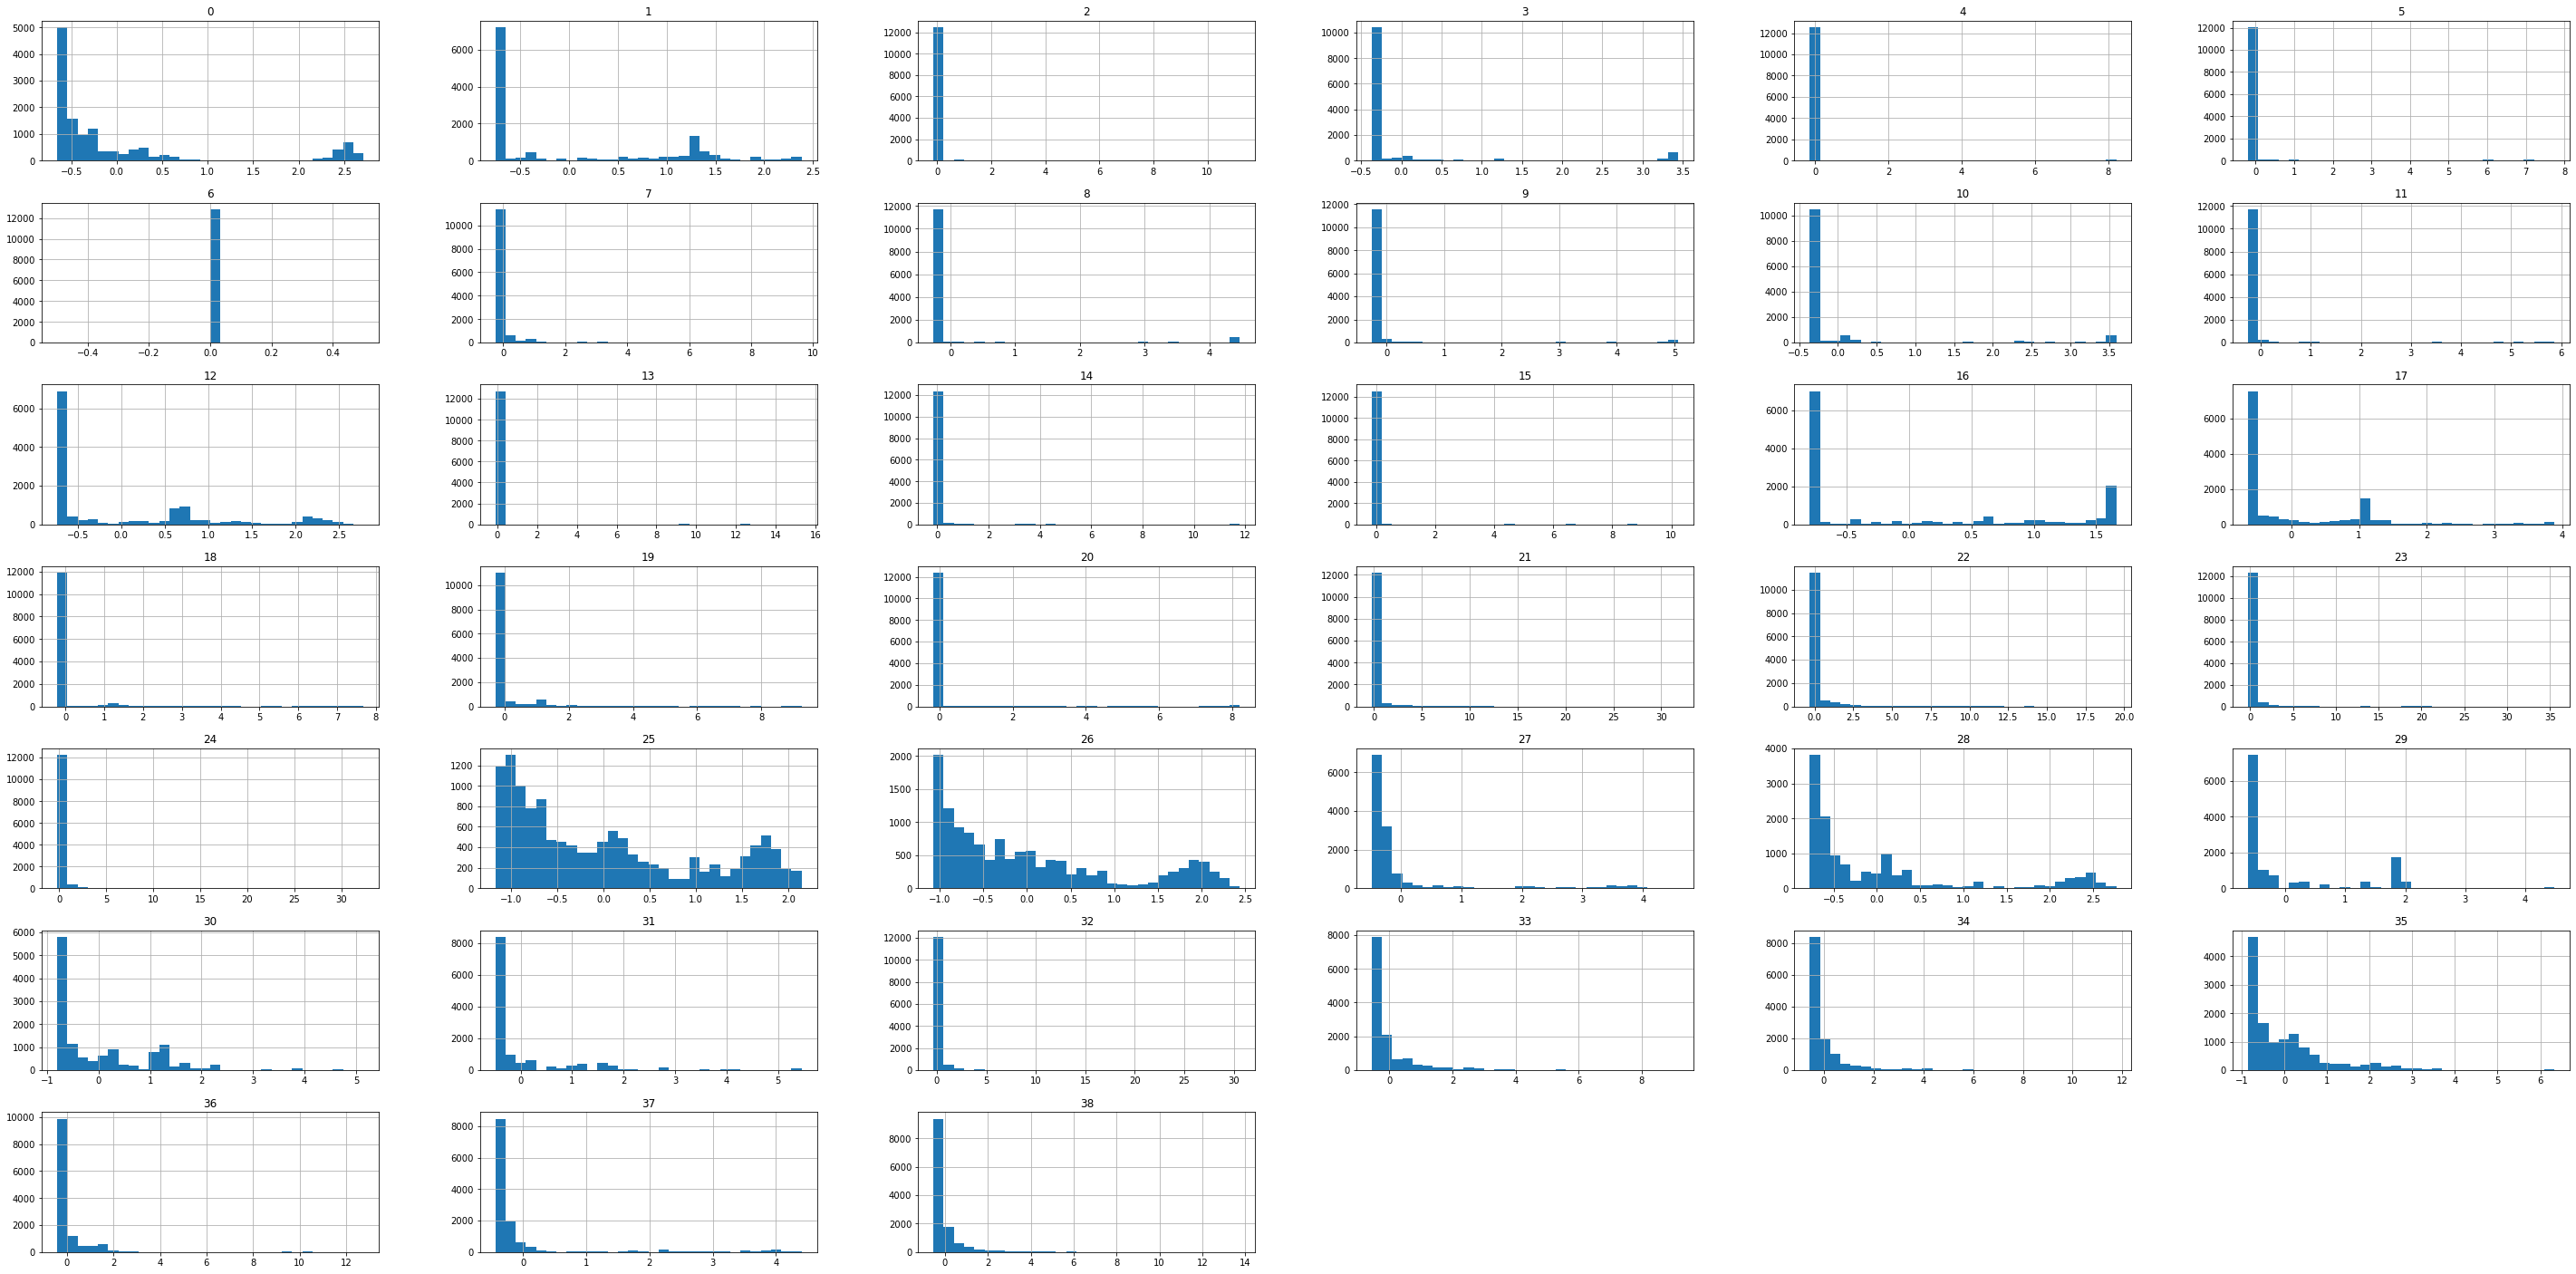

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(df_robust_scaler))
X_train_scaled.hist(bins=30, figsize = (50,25))